# MA2K4 Assignment 4

Student ID - 2161367 and 2103654 

### 4.7) a)

In [1]:
# Libraries
import numpy as np
import scipy
from scipy import integrate
import matplotlib.pyplot as plt
import pylab
import pandas as pd

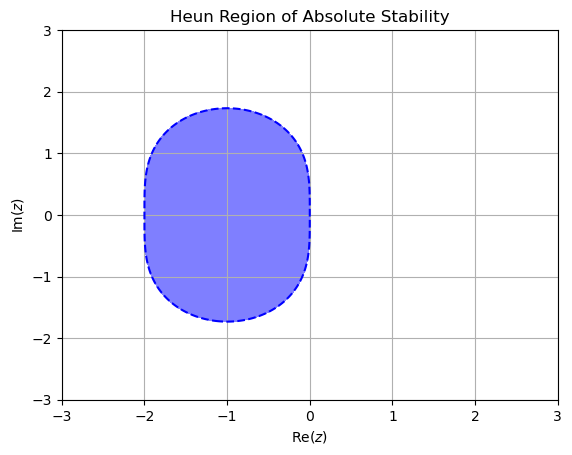

In [2]:
# Initialising meshgrid
a = np.linspace(-3, 3, 1000)
b = np.linspace(-3, 3, 1000)
A, B = np.meshgrid(a, b)

# Plotting
# |1 + z + 0.5*z^2| < 1
pylab.contourf(A, B, np.abs(1 + (A + B * 1j) + 1/2 * (A + B * 1j)**2), [0,1], colors='b', alpha=0.5)
pylab.contour(A, B, np.abs(1 + (A + B * 1j) + 1/2 * (A + B * 1j)**2), [0,1], colors='b', linestyles = '--')
pylab.title('Heun Region of Absolute Stability')
pylab.xlabel('Re$(z)$')
pylab.ylabel('Im$(z)$')
pylab.grid()
pylab.xlim(-3, 3)
pylab.ylim(-3, 3)
pylab.show()

The Heun method is not A-stable as not all $\lambda$ with negative real parts are absolutely stable. This can be seen as the left half of the plane is not all filled in.

### 4.7) b)

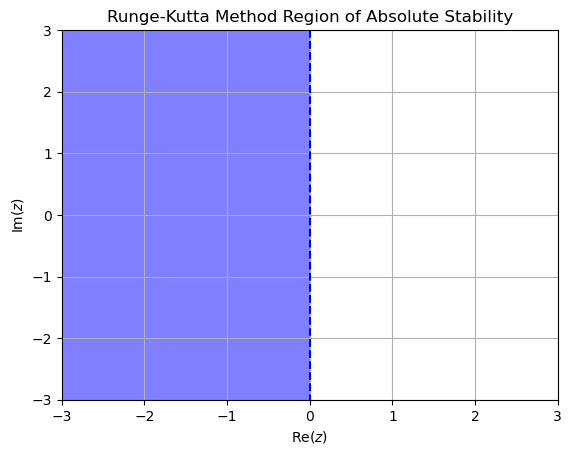

In [3]:
# Initialising meshgrid and equations
a = np.linspace(-3, 3, 1000)
b = np.linspace(-3, 3, 1000)
A, B = np.meshgrid(a, b)
temp1 = 1 + 0.5*(A + B * 1j) + 1/12 * ((A + B * 1j))**2
temp2 = 1 - 0.5*(A + B * 1j) + 1/12 * ((A + B * 1j))**2
absStab = np.abs(temp1 / temp2)

# plotting
pylab.contourf(A, B, absStab, [0,1], colors='b', alpha=0.5)
pylab.contour(A, B, absStab, [0,1], colors='b', linestyles = '--')
pylab.title('Runge-Kutta Method Region of Absolute Stability')
pylab.xlabel('Re$(z)$')
pylab.ylabel('Im$(z)$')
pylab.grid()
pylab.xlim(-3, 3)
pylab.ylim(-3, 3)
pylab.show()

The Runge-Kutta method defined in 4.6 is A-stable as all negative real parts are absolutely stable, since the entire left hand plane is coloured in.

### 4.8) a)

In [4]:
# Defining lastError as in question
def func(t, y):
    return -(1 + t) * y**2

def evolve(t0, y0, f, Phi, h, N):
    retArr = [y0]
    yNext = y0
    for i in range(int(N)):
        t = t0 + h * i
        yNext = Phi(t, yNext, f, h) + retArr[-1]
        retArr.append(yNext)
    return retArr

# Function to compute the error at the final step
def lastError(Phi, h, N):
    t0 = 0
    y0 = 1
    tN = h * N
    exact =  2 / (tN**2 + 2*tN + 2)
    approx = evolve(t0, y0, func, Phi, h, N)[-1]
    return np.abs(exact - approx)

### 4.8) b)

In [5]:
# Defining EOC (experimental order of convergence) as in question
def EOC(hs, es):
    eocArr = np.zeros_like(es)
    for i in range(1, len(es)):
        tempH = hs[i - 1] / hs[i]
        tempE = es[i - 1] / es[i]
        if tempH == 0:
            eocArr[i] = np.nan  # Avoid division by zero
        else:
            eocArr[i] = np.log(tempE) / np.log(tempH)
    eocArr[0] = np.nan
    return eocArr

### 4.8) c)

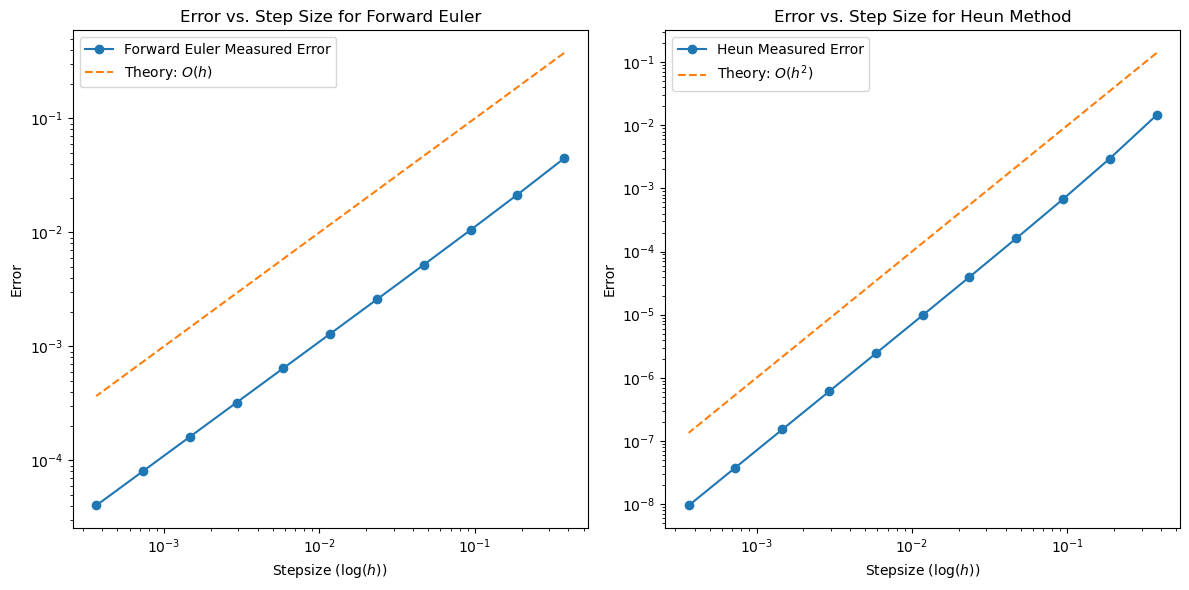


|$h$|EOC (Forward Euler)| EOC (Heun)|
|---|---|---|
|0.375|nan|nan|
|0.1875|1.0576270767756863|2.2843870907013284|
|0.09375|1.0295004342429357|2.13840239413914|
|0.046875|1.014778792548221|2.0665635123817214|
|0.0234375|1.0073811907852965|2.0325469004791477|
|0.01171875|1.0036869187039223|2.0160852555497675|
|0.005859375|1.0018423543643378|2.007995250499276|
|0.0029296875|1.0009208787447796|2.003985752629322|
|0.00146484375|1.0004603620558152|2.0019899072427245|
|0.000732421875|1.000230161361184|2.0009942059848354|
|0.0003662109375|1.0001150757208803|2.0004970168719964|


In [6]:
# Implementing the forward Euler method
def forwardEuler(t, u, f, h):
    return f(t, u)

# Implementing the Heun method
def Heun(t, u, f, h):
    uEul = u + h * f(t, u)
    inc = 0.5 * (f(t, u) + f(t + h, uEul))
    return inc

# Implementing the evolve function to generate an approximate solution
def evolve(t0, y0, f, Phi, h, N):
    retArr = [y0]
    yNext = y0
    for i in range(int(N)):
        t = t0 + h * i
        yNext = h * Phi(t, yNext, f, h) + retArr[-1]
        retArr.append(yNext)
    return retArr

# Parameters
N0 = 4
T = 1.5
hk = np.zeros(11)
Nk = np.zeros(11)

# Generating step array
for i in range(11):
    Nk[i] = int(N0 * 2 ** i)
    hk[i] = T / Nk[i]

# Computing errors for Forward Euler and Heun methods
errors_FE = [lastError(forwardEuler, h, N) for h, N in zip(hk, Nk)]
errors_Heun = [lastError(Heun, h, N) for h, N in zip(hk, Nk)]

# Computing EOC for Forward Euler and Heun methods
eoc_FE = EOC(hk, errors_FE)
eoc_Heun = EOC(hk, errors_Heun)

# Plotting
plt.figure(figsize=(12, 6))

# Forward Euler
plt.subplot(1, 2, 1)
plt.loglog(hk, errors_FE, marker = 'o', label = 'Forward Euler Measured Error')
plt.loglog(hk, hk, '--', label='Theory: $O(h)$')
plt.xlabel('Stepsize (log($h$))')
plt.ylabel('Error')
plt.title('Error vs. Step Size for Forward Euler')
plt.legend()

# Heun method
plt.subplot(1, 2, 2)
plt.loglog(hk, errors_Heun, marker = 'o', label = 'Heun Measured Error')
plt.loglog(hk, hk**2, '--', label='Theory: $O(h^2)$')
plt.xlabel('Stepsize (log($h$))')
plt.ylabel('Error')
plt.title('Error vs. Step Size for Heun Method')
plt.legend()

plt.tight_layout()
plt.show()

# Table of EOCs
from IPython.display import display, Markdown
table = '''
|$h$|EOC (Forward Euler)| EOC (Heun)|
|---|---|---|
'''

for i in range(len(hk)):
    table += f'|{hk[i]}|{eoc_FE[i]}|{eoc_Heun[i]}|\n'

# display the table
display(Markdown(table))

The forward Euler method has an error scaling like $h$ while the Heun method has an error scaling like $h^2$. This is shown in their respective graphs. 
We notice with decreasing stepsize h, for the forward Euler method we approximate an EOC of roughly 1, becoming better and better for smaller h. The error is of order 1.
As for the Heun method, we can observe that the EOC is roughly 2. The error is of order 2.

### 4.9) a)

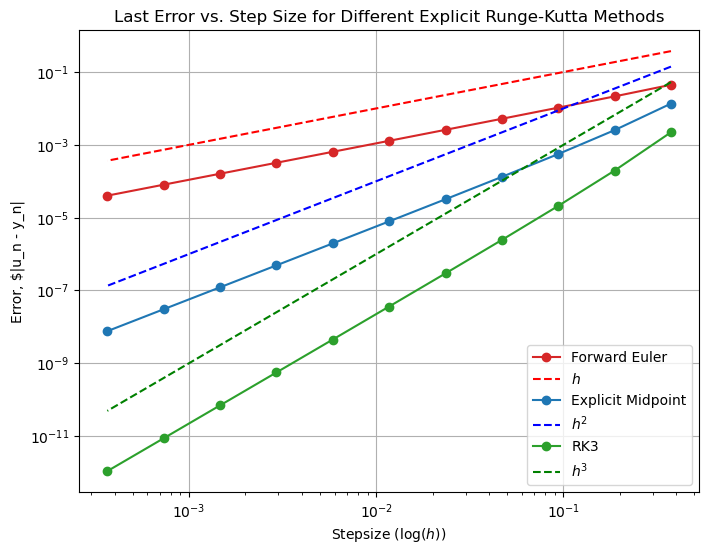

In [7]:
# Defining our explicit Runge-Kutta function
def explicitRK(t, u, f, h, A, b, c):
    s = len(c)
    if type(u) == int:
        u = np.array([u])
    dim = len(u)
    
    # Initialise K
    K = np.zeros((s, dim))
    
    # Calculate sum for each K
    for i in range(s):
        tn = t + c[i] * h
        un = u.copy().astype(float)
        for j in range(i):
            un += h * A[i][j] * K[j]
        K[i] = f(tn, un)
        
    # Compute u_{n+1} 
    uNext = 0
    
    # Increment function as describe in notes Chpt 6.
    for i in range(s):
        uNext += b[i] * K[i]
    return uNext

# Defining all explicit methods from question
def RKforE(t, u, f, h):
    A = [0]
    b = [1]
    c = [0]
    return explicitRK(t, u, f, h, A, b, c)

def RKmidP(t, u, f, h):
    A = [[0 ,0] ,[1/2 ,0]]
    b = [0, 1]
    c = [0 ,1/2]
    return explicitRK(t, u, f, h, A, b, c)

def RK3(t, u, f, h):
    A = [[0 ,0 ,0] ,[1/2 ,0 ,0] ,[ -1 ,2 ,0]]
    b = [1/6 ,2/3 ,1/6]
    c = [0 ,1/2 ,1]
    return explicitRK(t, u, f, h, A, b, c)

# Compute errors for each method
errors_FE = [lastError(RKforE, h, N) for h, N in zip(hk, Nk)] # Using previous hk and Nk
errors_mid = [lastError(RKmidP, h, N) for h, N in zip(hk, Nk)]
errors_RK3 = [lastError(RK3, h, N) for h, N in zip(hk, Nk)]

# Plotting
plt.figure(figsize=(8, 6))
plt.loglog(hk, errors_FE, marker='o', label='Forward Euler', linestyle = '-', color = 'tab:red')
plt.loglog(hk, hk, 'r--', label='$h$')
plt.loglog(hk, errors_mid, marker='o', label='Explicit Midpoint', linestyle = '-', color = 'tab:blue')
plt.loglog(hk, hk**2, 'b--', label='$h^2$')
plt.loglog(hk, errors_RK3, marker='o', label='RK3', linestyle = '-', color = 'tab:green')
plt.loglog(hk, hk**3, 'g--', label='$h^3$')
plt.xlabel('Stepsize (log($h$))')
plt.ylabel('Error, $|u_n - y_n|')
plt.title('Last Error vs. Step Size for Different Explicit Runge-Kutta Methods')
plt.legend(loc = 'lower right')
plt.grid(True)

plt.show()

For the Forward Euler method, we observe an order of 1. For the Explicit Midpoint method, we observe of an order of 2. For the RK3 method, we observe of an order of 3. This is because we have a slope close to 1, 2, and 3 on our log-log plot, which indicates first, second, and third-order convergence respectively. This matches the number of stages for each respective method. 

Our error order matches what we would expect in theory from the graph since they are parallel to their slopes.

### 4.9) b)

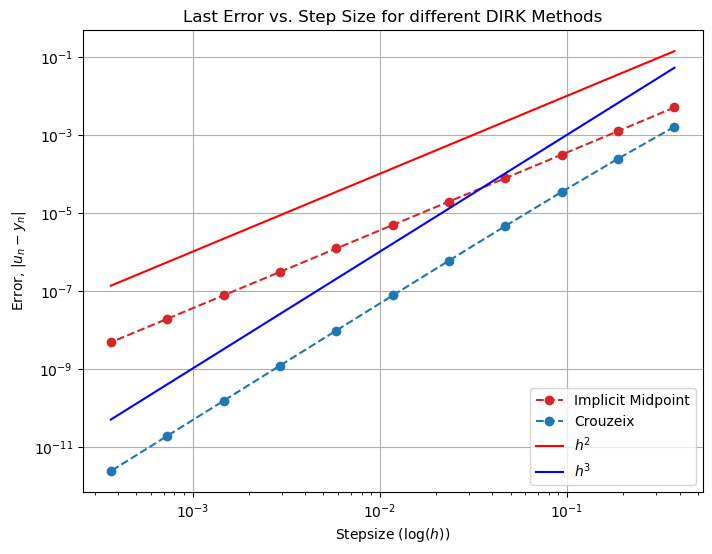

In [8]:
from scipy.optimize import root_scalar

# Defining DIRK
def DIRK(t, u, f, h, A, b, c):
    s = len(c)
    if type(u) == int:
        u = np.array([u])
    dim = len(u)
    
    # Initialize K matrix
    K = np.zeros((s, dim))
    A = np.array(A).reshape((s, s))
    
    # Compute K matrix for each stage
    for i in range(s):
        total = 0
        
        for j in range(i):
            total += h * A[i][j] * K[j]
             
        # Define the function F(x) for root finding
        def F(x):
            return x - f(t + h * c[i], u + total + h * x * A[i][i])
        
        # Find the root of F(x)
        K[i] = root_scalar(F, x0=f(t, u), x1=2 * f(t, u)).root
    
    # Compute u_{n+1} 
    uNext = 0

    # Increment function
    for i in range(s):
        uNext += b[i] * K[i]
    
    return uNext

# Defining both DIRK methods from assignment
def RKimp_mid(t, u, f, h):
    A = [1/2]
    b = [1]
    c = [1/2]
    return DIRK(t, u, f, h, A, b, c)

def Crouzeix(t, u, f, h):
    A = [[1/2 + np.sqrt(3)/6, 0], [-np.sqrt(3)/3, 1/2 + np.sqrt(3)/6]]
    b = [1/2, 1/2]
    c = [1/2 + np.sqrt(3)/6, 1/2 - np.sqrt(3)/6]
    return DIRK(t, u, f, h, A, b, c)

# Compute errors for each method
errors_imp = [lastError(RKimp_mid, h, N) for h, N in zip(hk, Nk)] # Using previous hk and Nk
errors_crou = [lastError(Crouzeix, h, N) for h, N in zip(hk, Nk)]

# Plotting
plt.figure(figsize=(8, 6))
plt.loglog(hk, errors_imp, marker='o', label='Implicit Midpoint', linestyle = '--', color = 'tab:red')
plt.loglog(hk, errors_crou, marker='o', label='Crouzeix', linestyle = '--', color = 'tab:blue')
plt.loglog(hk, hk**2, 'r-', label='$h^2$')
plt.loglog(hk, hk**3, 'b-', label='$h^3$')
plt.xlabel('Stepsize (log($h$))')
plt.ylabel('Error, $|u_n - y_n|$')
plt.title('Last Error vs. Step Size for different DIRK Methods')
plt.legend(loc = 'lower right')
plt.grid(True)

plt.show()

As we can see from above, the implicit midpoint method is parallel to the $h^2$ graph which implies the Implicit Midpoint method has order 2. Similarly for the Crouzeix method, being parallel to $h^3$ implies that it has order 3. Thus, we have verified graphically that these methods have orders 2 and 3 :)

For the explicit methods, each method has the same order as stages where as implicit methods have one higher order; e.g. the Implicit Midpoint having 1 stage and order 2. As higher order implies a more stable method, it would suggest that the implicit methods are relatively more stable than explicit methods.